In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch.nn as nn

In [4]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [5]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [6]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype = torch.float)

In [7]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [9]:
y = 2*X + 1 + e 

In [10]:
y.shape

torch.Size([50, 1])

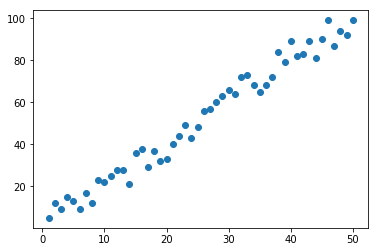

In [13]:
plt.scatter(X.numpy(),y.numpy())

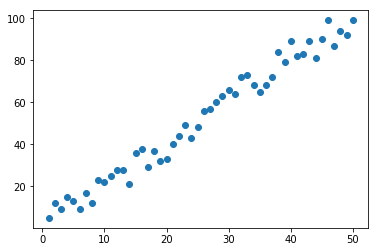

In [14]:
plt.scatter(X.numpy(),y.numpy());

In [16]:
torch.manual_seed(59)
model = nn.Linear(in_features = 1, out_features = 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [35]:
class Model(nn.Module):
    def __init__(self,in_features, out_features):
        super().__init__()
        self.lineer = nn.Linear(in_features, out_features)
    def forward(self,x):
        y_pred = self.lineer(x)
        return y_pred

In [36]:
torch.manual_seed(59)
model = Model(1,1)
print(model.lineer.weight)
print(model.lineer.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [37]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

lineer.weight 	 0.10597813129425049
lineer.bias 	 0.9637961387634277


In [38]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [42]:
x1 = np.linspace(1.0, 50.0,50)
x1

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [43]:
w1 = 0.10597813129
b1 = 0.96379613
y1 = w1*x1+b1
y1

array([1.06977426, 1.17575239, 1.28173052, 1.38770866, 1.49368679,
       1.59966492, 1.70564305, 1.81162118, 1.91759931, 2.02357744,
       2.12955557, 2.23553371, 2.34151184, 2.44748997, 2.5534681 ,
       2.65944623, 2.76542436, 2.87140249, 2.97738062, 3.08335876,
       3.18933689, 3.29531502, 3.40129315, 3.50727128, 3.61324941,
       3.71922754, 3.82520567, 3.93118381, 4.03716194, 4.14314007,
       4.2491182 , 4.35509633, 4.46107446, 4.56705259, 4.67303073,
       4.77900886, 4.88498699, 4.99096512, 5.09694325, 5.20292138,
       5.30889951, 5.41487764, 5.52085578, 5.62683391, 5.73281204,
       5.83879017, 5.9447683 , 6.05074643, 6.15672456, 6.26270269])

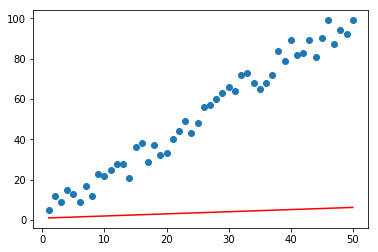

In [44]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

In [45]:
criterion = nn.MSELoss()

In [46]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [50]:
epochs = 50
losses = []
for i in range (epochs):
    i = i+1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print(f"epoch {i} loss: {loss.item()} weight: {model.lineer.weight.item()} bias: {model.lineer.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.531005859375 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 3 loss: 830.3001098632812 weight: 1.0148327350616455 bias: 0.9922627806663513
epoch 4 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 5 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.989227294921875 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.0291162729

Text(0.5, 0, 'Epoch')

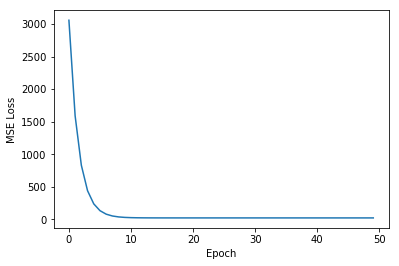

In [51]:
plt.plot(range(epochs),losses)
plt.ylabel("MSE Loss")
plt.xlabel("Epoch")

In [53]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.lineer.weight.item()
current_bias = model.lineer.bias.item()
pred_y = current_weight*x + current_bias

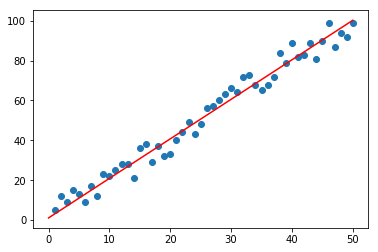

In [54]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x, pred_y, 'r')